In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import math
import numpy as np

In [2]:
#THe following script will import the data
Tg = []
Longg = []
Latg = []


fo=open("GPScoordinatesTest.txt","r")


comp = 0
for line in fo:
# Extract the timestamps for every layer; gcode command line: ;TIME_ELAPSED:455.443973

    if line.startswith('   '):
        words=line.split()
        tvalue = -1
        longvalue = -1
        latvalue = -1
        for word in words:
                if word.startswith('lat'): latvalue = float(word[5:15])
                if word.startswith('lon'): longvalue = float(word[5:14])
                if word.startswith('<time>'): tvalue = str(word[6:25])

        
        if tvalue is not -1 : Tg.append(tvalue)
            
        if longvalue is not -1 : Longg.append(longvalue)
            
        if latvalue is not -1 : Latg.append(latvalue)

print("File Length: ")
print(len(Tg))
result = pd.DataFrame()
result['Time'] = Tg
result['Longitude'] = Longg
result['Latitude']= Latg








File Length: 
459


<>:25: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:27: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:29: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:25: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:27: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:29: SyntaxWarning: "is not" with a literal. Did you mean "!="?
C:\Users\maasg\AppData\Local\Temp\ipykernel_31236\2745652169.py:25: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if tvalue is not -1 : Tg.append(tvalue)
C:\Users\maasg\AppData\Local\Temp\ipykernel_31236\2745652169.py:27: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if longvalue is not -1 : Longg.append(longvalue)
C:\Users\maasg\AppData\Local\Temp\ipykernel_31236\2745652169.py:29: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if latvalue is not -1 : Latg.append(latvalue)


In [3]:
result['Time'] = pd.to_datetime(result['Time'])

In [4]:
result['epoch'] = (result['Time'] - dt.datetime(1970,1,1)).dt.total_seconds()

In [5]:
result['dtime'] = 0

for i in range (1, len(result)):
    dtime = result.epoch[i]-result.epoch[i-1]
    result.dtime[i] = dtime
#There is a second in between every measurement (roughly), sometimes 2 seconds


C:\Users\maasg\AppData\Local\Temp\ipykernel_31236\1633547660.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.dtime[i] = dtime


,Time,Longitude,Latitude,epoch,dtime
0,2022-04-05 15:22:22,4.898175,52.389519,1.649172e+09,0
1,2022-04-05 15:22:23,4.898187,52.389508,1.649172e+09,1
2,2022-04-05 15:22:24,4.898194,52.389500,1.649172e+09,1
3,2022-04-05 15:22:25,4.898202,52.389491,1.649172e+09,1
4,2022-04-05 15:22:26,4.898209,52.389483,1.649172e+09,1


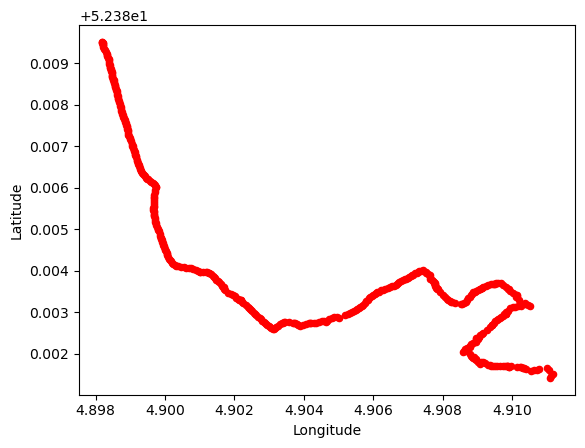

In [6]:
# result.head()
# result = result.loc[100:150]
result.plot(kind='scatter',x='Longitude',y='Latitude',color='red')
result.head()

In [24]:
result['epoch'] = result['epoch']-result.epoch[0]
result['epoch'] = result['epoch']*10
x = result['epoch'].values.tolist()
y = result['Longitude'].values.tolist()
z = result['Latitude'].values.tolist()

new_x = list(range(0, (len(result)+1)*10))
new_y = np.interp(new_x, x, y)
new_z = np.interp(new_x, x, z)
dict = {'epoch': new_x, 'Longitude': new_y, 'Latitude': new_z} 
    
result_interpolated = pd.DataFrame(dict)
#result_interpolated.head(50)
result_interpolated['epoch'] = result_interpolated['epoch']/10

In [32]:
result_interpolated['direction'] = 0
result_interpolated['angle'] = 0
direction = 0
anglevar = 0
for i in range (2, len(result_interpolated)):
    Xa = result_interpolated.Longitude[i-1]-result_interpolated.Longitude[i]
    Ya = result_interpolated.Latitude[i-1]-result_interpolated.Latitude[i]
    Xb = result_interpolated.Longitude[i-2]-result_interpolated.Longitude[i-1]
    Yb = result_interpolated.Latitude[i-2]-result_interpolated.Latitude[i-1]
    high = (Xa*Xb+Ya*Yb)
    low = math.sqrt(pow(Xa, 2)+pow(Ya, 2))*math.sqrt(pow(Xb, 2)+pow(Yb, 2))
    angle = high/low

    if (angle<=1 and angle>=-1):
        anglevar = math.acos(angle)
        result_interpolated.angle[i] = anglevar
        
        direction = math.sin(Xa*Yb - Ya*Xb)
        
#     result.wedge[i] = direction
    if (direction < -0.0000 and anglevar > 0.05):
        result_interpolated.direction[i] = 'Left'
    if (direction > 0.0000 and anglevar > 0.05):
        result_interpolated.direction[i] = 'Right'    
    if (anglevar <=0.05 and anglevar > 0):
        result_interpolated.direction[i] = 'Neutral'
    if (anglevar ==0):
        result_interpolated.direction[i] = result_interpolated.direction[i-1]
    
#There is a second in between every measurement (roughly), sometimes 2 seconds

C:\Users\maasg\AppData\Local\Temp\ipykernel_31236\3411808332.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_interpolated.angle[i] = anglevar
C:\Users\maasg\AppData\Local\Temp\ipykernel_31236\3411808332.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_interpolated.direction[i] = result_interpolated.direction[i-1]
C:\Users\maasg\AppData\Local\Temp\ipykernel_31236\3411808332.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

In [33]:
# result_interpolated.loc[0:50].plot(kind='scatter',x='Longitude',y='Latitude',color='red')
result_interpolated.loc[50:10]

,epoch,Longitude,Latitude,direction,angle
0,0.0,4.898175,52.389519,0,0.000000e+00
1,0.1,4.898176,52.389518,0,0.000000e+00
2,0.2,4.898177,52.389517,0,0.000000e+00
3,0.3,4.898179,52.389516,0,0.000000e+00
4,0.4,4.898180,52.389515,0,0.000000e+00
5,0.5,4.898181,52.389513,0,0.000000e+00
6,0.6,4.898182,52.389512,0,0.000000e+00
7,0.7,4.898183,52.389511,0,0.000000e+00
8,0.8,4.898185,52.389510,0,0.000000e+00
9,0.9,4.898186,52.389509,0,0.000000e+00


In [29]:
result.tail(50)

,Time,Longitude,Latitude,epoch,dtime
409,2022-04-05 15:30:55,4.908774,52.382159,5130.0,1
410,2022-04-05 15:30:56,4.908706,52.382137,5140.0,1
411,2022-04-05 15:30:58,4.908647,52.382102,5160.0,2
412,2022-04-05 15:30:59,4.908618,52.382071,5170.0,1
413,2022-04-05 15:31:00,4.908595,52.382045,5180.0,1
414,2022-04-05 15:31:01,4.908666,52.382056,5190.0,1
415,2022-04-05 15:31:03,4.908783,52.382004,5210.0,2
416,2022-04-05 15:31:04,4.908806,52.381949,5220.0,1
417,2022-04-05 15:31:05,4.908836,52.381924,5230.0,1
418,2022-04-05 15:31:06,4.908870,52.381902,5240.0,1
